<a href="https://colab.research.google.com/github/camyllalima/PDI-Exercicios/blob/main/PDI_Lista2_Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e Instalações

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalando Córnia
%%capture
%matplotlib inline
!pip install kornia

In [ ]:
import torch
import kornia
kornia.__version__

'0.8.0'

In [ ]:
# Instalando scikit
!pip install -U scikit-image

In [ ]:
from math import sqrt,exp
from skimage import data

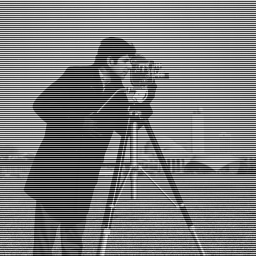

In [ ]:
# Carrega a imagem do cameraman
cameraman_path = '/content/drive/MyDrive/Lista2_imagens/cameraman_pattern.png'

# Mostra o template
cv2_imshow(cv2.imread(cameraman_path, cv2.IMREAD_GRAYSCALE))

# Filtragem no Domínio da Frequência

In [ ]:
# Lê a imagem
cameraman_gray = cv2.imread(cameraman_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Calcula a transformada de Fourier
original = np.fft.fft2(cameraman_gray)
center = np.fft.fftshift(original)
spectrum = np.log(1 + np.abs(center))

In [ ]:
# Cria uma máscara para remover os componentes periódicos
rows, cols = cameraman_gray.shape
crow, ccol = rows // 2, cols // 2

# Cria máscara passa-baixa
mask = np.ones((rows, cols), np.uint8)
r = 100
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

# Aplica a máscara
center_filtered = center.copy()
center_filtered[mask == 1] = center_filtered[mask == 1] * 0.2

# Aplica o filtro passa-baixa
d0 = 60  # Frequência de corte
x = np.arange(0, cols, 1)
y = np.arange(0, rows, 1)
X, Y = np.meshgrid(x, y)
D = np.sqrt((X - ccol)**2 + (Y - crow)**2)
low_pass = np.exp(-(D**2)/(2*(d0**2)))
center_filtered = center_filtered * low_pass

In [ ]:
# Reconstroe a imagem
filtered = np.fft.ifftshift(center_filtered)
img_filtered = np.fft.ifft2(filtered)
img_filtered = np.abs(img_filtered)

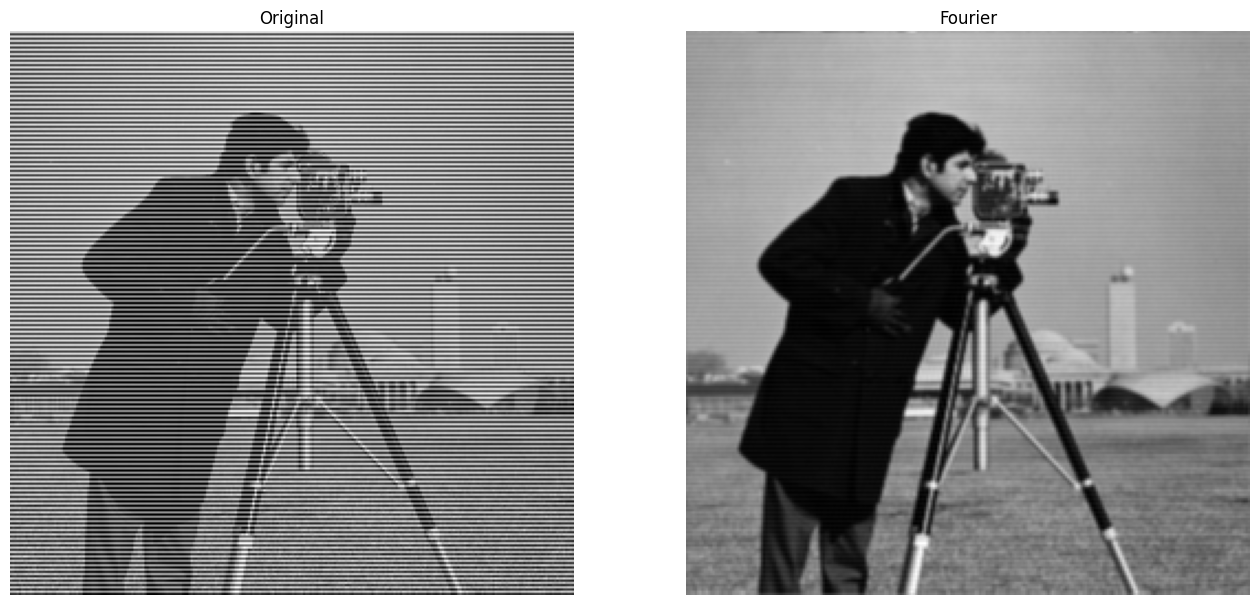

In [ ]:
# Mostrando o antes e depois da aplicação da transformada de fourier e filtro passa baixa
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(cameraman_gray, 'gray')
axs[1].axis('off')
axs[1].set_title('Fourier')
axs[1].imshow(img_filtered, 'gray')
plt.show()

In [ ]:
# Convertendo a imagem para tensor
data: torch.tensor = kornia.utils.image_to_tensor(img_filtered , keepdim=False)
data_02 = data.float() / 255.

#O filtro de máscara de nitidez é inicializado com o formato kornia.filters.UnsharpMask(kernel_size, sigma). Seus parâmetros podem ser variados.
sharpen = kornia.filters.UnsharpMask((15,15), (5.0,5.0))
                                    #specifies the kernel size for the Gaussian blur applied to the image,
                                    #specifies the strength of the sharpening effect (0 to 3.0 is recommended)

sharpened_tensor_02 = sharpen(data_02)
difference_02 = (sharpened_tensor_02 - data_02).abs()

# Convertendo o tensor sharpened para imagem
sharpened_image_02  = kornia.utils.tensor_to_image(sharpened_tensor_02)
difference_image_02 = kornia.utils.tensor_to_image(difference_02)

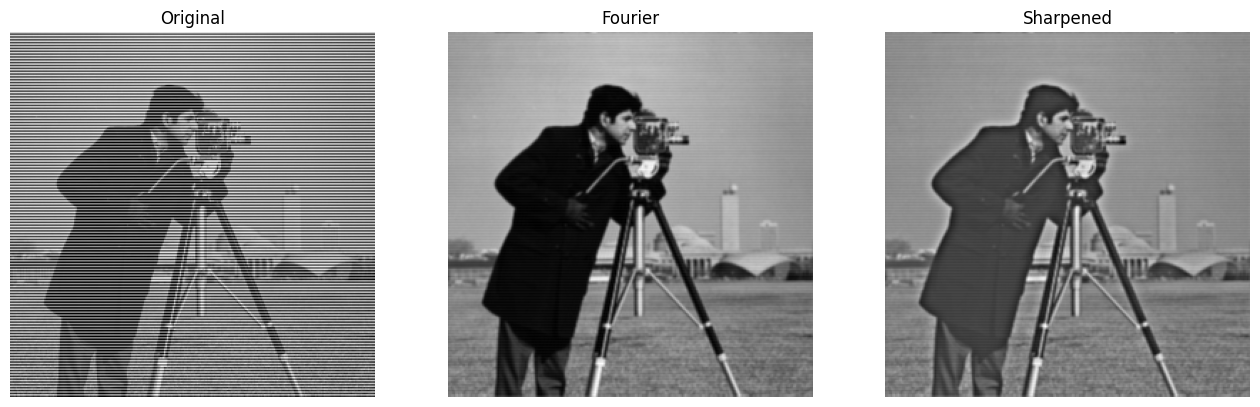

In [ ]:
# Comparando as três versões
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(cameraman_gray, 'gray')
axs[1].axis('off')
axs[1].set_title('Fourier')
axs[1].imshow(img_filtered, 'gray')
axs[2].axis('off')
axs[2].set_title('Sharpened')
axs[2].imshow(sharpened_image_02, 'gray')
plt.show()

# Filtragem no Domínio Espacial

In [ ]:
# Lê a imagem
cameraman = cv2.imread(cameraman_path)

# Aplicando o filtro Gaussiano
cameraman_blur = cv2.GaussianBlur(cameraman, (3,3), 0)

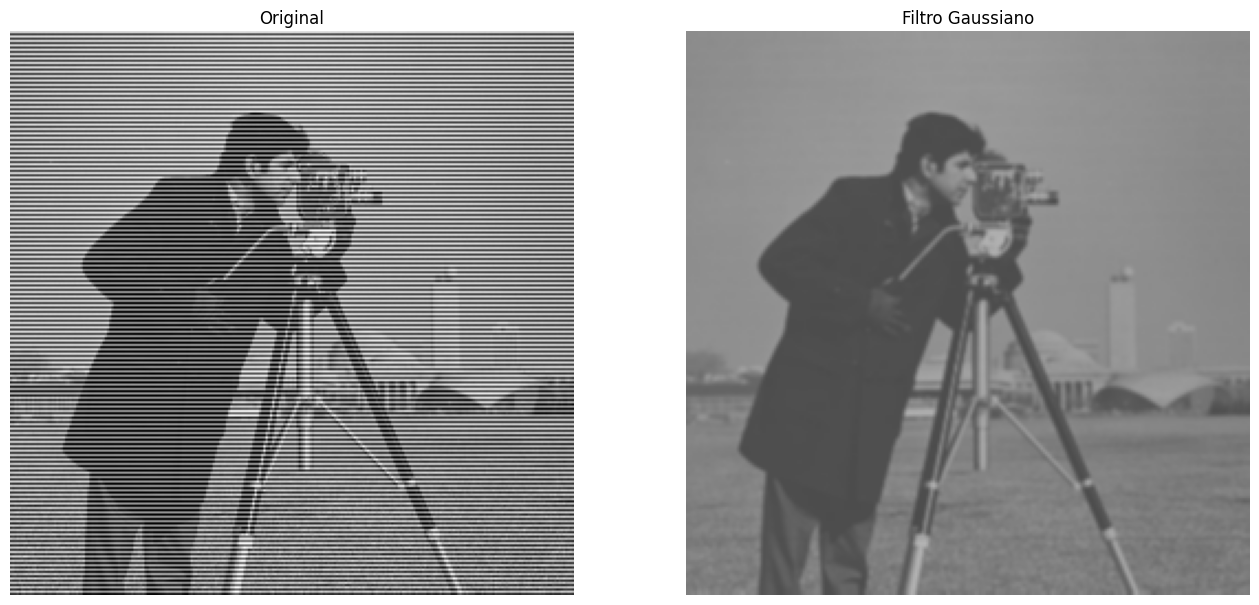

In [ ]:
# Mostrando o antes e depois da aplicação do filtro
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(cameraman)
axs[1].axis('off')
axs[1].set_title('Filtro Gaussiano')
axs[1].imshow(cameraman_blur)
plt.show()

In [ ]:
# Convertendo a imagem para tensor
data: torch.tensor = kornia.utils.image_to_tensor(cameraman_blur , keepdim=False)
data_01 = data.float() / 255.

#O filtro de máscara de nitidez é inicializado com o formato kornia.filters.UnsharpMask(kernel_size, sigma). Seus parâmetros podem ser variados.
sharpen = kornia.filters.UnsharpMask((15,15), (5.0,5.0))
                                    #specifies the kernel size for the Gaussian blur applied to the image,
                                    #specifies the strength of the sharpening effect (0 to 3.0 is recommended)

sharpened_tensor_01 = sharpen(data_01)
difference_01 = (sharpened_tensor_01 - data_01).abs()

# Convertendo o tensor sharpened para imagem
sharpened_image_01  = kornia.utils.tensor_to_image(sharpened_tensor_01)
difference_image_01 = kornia.utils.tensor_to_image(difference_01)

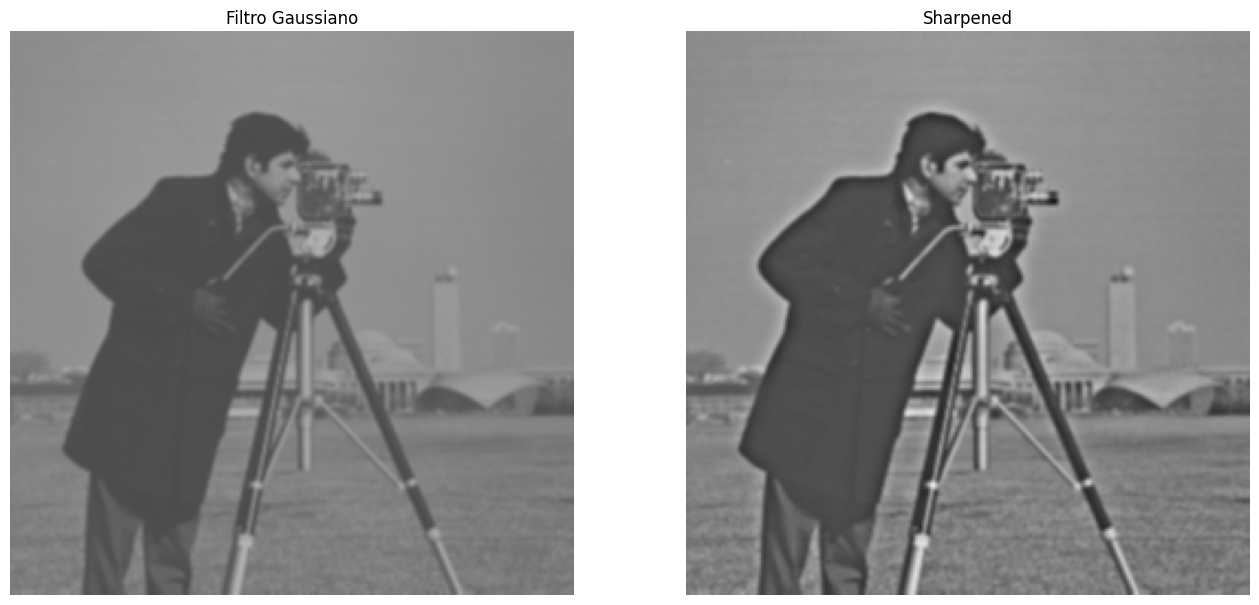

In [ ]:
# Mostrando o antes e depois da aplicação do filtro
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Filtro Gaussiano')
axs[0].imshow(cameraman_blur)
axs[1].axis('off')
axs[1].set_title('Sharpened')
axs[1].imshow(sharpened_image_01)
plt.show()

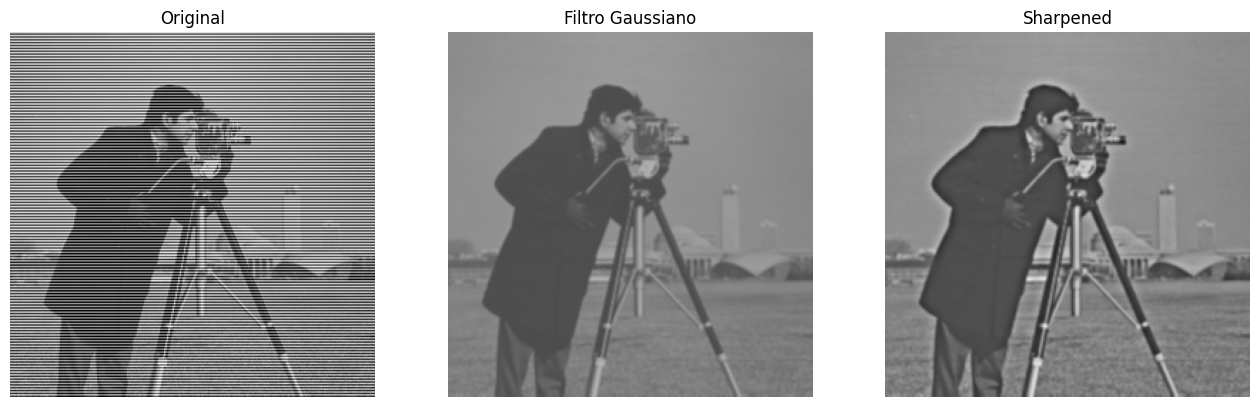

In [ ]:
# Comparando as três versões
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(cameraman)
axs[1].axis('off')
axs[1].set_title('Filtro Gaussiano')
axs[1].imshow(cameraman_blur)
axs[2].axis('off')
axs[2].set_title('Sharpened')
axs[2].imshow(sharpened_image_01)
plt.show()